In [1]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime
import json

import numpy as np
np.seterr(all='raise')
from PIL import Image

from lpf.data import load_model_dicts
from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [2]:
batch_size = 1  # A single set of parameters
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 500000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [3]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [4]:
# Create a dict for parameters.
param_dict = param_dict = {
    "u0": 2.0, "v0": 1.0,
    "Du": 0.0005, "Dv": 0.075,
    "ru": 0.18, "rv": 0.02874,
    "su": 0.001, "sv": 0.025, 
    "k": 0.084, 
    "mu": 0.08     
}

In [5]:
# In this example, we use random positions for initializing u with u0.
for i in range(25):
    param_dict["init_pts_%d"%(i+1)] = (np.random.randint(0, height), np.random.randint(0, width))

In [6]:
param_dict

{'u0': 2.0,
 'v0': 1.0,
 'Du': 0.0005,
 'Dv': 0.075,
 'ru': 0.18,
 'rv': 0.02874,
 'su': 0.001,
 'sv': 0.025,
 'k': 0.084,
 'mu': 0.08,
 'init_pts_1': (79, 73),
 'init_pts_2': (64, 86),
 'init_pts_3': (59, 62),
 'init_pts_4': (18, 88),
 'init_pts_5': (35, 117),
 'init_pts_6': (23, 15),
 'init_pts_7': (125, 76),
 'init_pts_8': (105, 68),
 'init_pts_9': (7, 72),
 'init_pts_10': (5, 113),
 'init_pts_11': (108, 49),
 'init_pts_12': (12, 101),
 'init_pts_13': (33, 86),
 'init_pts_14': (67, 119),
 'init_pts_15': (44, 22),
 'init_pts_16': (20, 91),
 'init_pts_17': (32, 76),
 'init_pts_18': (104, 66),
 'init_pts_19': (21, 26),
 'init_pts_20': (47, 109),
 'init_pts_21': (89, 35),
 'init_pts_22': (20, 8),
 'init_pts_23': (88, 115),
 'init_pts_24': (66, 12),
 'init_pts_25': (92, 79)}

In [7]:
param_dicts = []
param_dicts.append(param_dict)

In [8]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(param_dicts)
params = LiawModel.parse_params(param_dicts)

In [9]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [10]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    period_output=10000,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=1
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

- [Iteration #1] elapsed time: 1.09634e-02 sec.
- [Iteration #10000] elapsed time: 2.02456e+00 sec.
- [Iteration #20000] elapsed time: 2.04484e+00 sec.
- [Iteration #30000] elapsed time: 2.03772e+00 sec.
- [Iteration #40000] elapsed time: 2.04628e+00 sec.
- [Iteration #50000] elapsed time: 2.03296e+00 sec.
- [Iteration #60000] elapsed time: 2.02774e+00 sec.
- [Iteration #70000] elapsed time: 2.01031e+00 sec.
- [Iteration #80000] elapsed time: 2.04517e+00 sec.
- [Iteration #90000] elapsed time: 2.02747e+00 sec.
- [Iteration #100000] elapsed time: 2.04561e+00 sec.
- [Iteration #110000] elapsed time: 2.02290e+00 sec.
- [Iteration #120000] elapsed time: 2.04618e+00 sec.
- [Iteration #130000] elapsed time: 2.04317e+00 sec.
- [Iteration #140000] elapsed time: 2.01932e+00 sec.
- [Iteration #150000] elapsed time: 2.03788e+00 sec.
- [Iteration #160000] elapsed time: 2.05167e+00 sec.
- [Iteration #170000] elapsed time: 2.06975e+00 sec.
- [Iteration #180000] elapsed time: 2.06542e+00 sec.
- [Iter

In [11]:
# Sub-directories in the output directory
!ls {dpath_output}

model_1
models


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1d9ff21ca60>
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [12]:
# Generated images
dpath_images = pjoin(dpath_output, "model_1")
dpath_images

'D:\\repos\\lpf\\tutorials\\output\\experiment_batch_20230117-000837\\model_1'

In [13]:
!ls {dpath_images}

ladybird_000001.png
ladybird_010000.png
ladybird_020000.png
ladybird_030000.png
ladybird_040000.png
ladybird_050000.png
ladybird_060000.png
ladybird_070000.png
ladybird_080000.png
ladybird_090000.png
ladybird_100000.png
ladybird_110000.png
ladybird_120000.png
ladybird_130000.png
ladybird_140000.png
ladybird_150000.png
ladybird_160000.png
ladybird_170000.png
ladybird_180000.png
ladybird_190000.png
ladybird_200000.png
ladybird_210000.png
ladybird_220000.png
ladybird_230000.png
ladybird_240000.png
ladybird_250000.png
ladybird_260000.png
ladybird_270000.png
ladybird_280000.png
ladybird_290000.png
ladybird_300000.png
ladybird_310000.png
ladybird_320000.png
ladybird_330000.png
ladybird_340000.png
ladybird_350000.png
ladybird_360000.png
ladybird_370000.png
ladybird_380000.png
ladybird_390000.png
ladybird_400000.png
ladybird_410000.png
ladybird_420000.png
ladybird_430000.png
ladybird_440000.png
ladybird_450000.png
ladybird_460000.png
ladybird_470000.png
ladybird_480000.png
ladybird_490000.png


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1d9ff17f280>


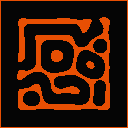

In [14]:
# Show the pattern at last.
img_pattern = Image.open(pjoin(dpath_images, "pattern_500000.png"))
img_pattern

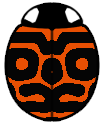

In [15]:
img_ladybird = Image.open(pjoin(dpath_images, "ladybird_500000.png"))
img_ladybird

In [16]:
# Model file
!ls {pjoin(dpath_output, "models")}

model_1.json


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1d9ff20ca00>


In [17]:
fpath_model = pjoin(dpath_output, "models", "model_1.json")
with open(fpath_model, "rt") as fin:
    model_dict = json.load(fin)
    
model_dict

{'index': 0,
 'generation': None,
 'fitness': None,
 'Du': 0.0005,
 'Dv': 0.075,
 'ru': 0.18,
 'rv': 0.02874,
 'k': 0.084,
 'su': 0.001,
 'sv': 0.025,
 'mu': 0.08,
 'width': 128,
 'height': 128,
 'dx': 0.1,
 'thr_color': 0.5,
 'color_u': [5, 5, 5],
 'color_v': [231, 79, 3],
 'initializer': 'LiawInitializer',
 'u0': 2.0,
 'v0': 1.0,
 'n_init_pts': 25,
 'init_pts_0': [79, 73],
 'init_pts_1': [64, 86],
 'init_pts_2': [59, 62],
 'init_pts_3': [18, 88],
 'init_pts_4': [35, 117],
 'init_pts_5': [23, 15],
 'init_pts_6': [125, 76],
 'init_pts_7': [105, 68],
 'init_pts_8': [7, 72],
 'init_pts_9': [5, 113],
 'init_pts_10': [108, 49],
 'init_pts_11': [12, 101],
 'init_pts_12': [33, 86],
 'init_pts_13': [67, 119],
 'init_pts_14': [44, 22],
 'init_pts_15': [20, 91],
 'init_pts_16': [32, 76],
 'init_pts_17': [104, 66],
 'init_pts_18': [21, 26],
 'init_pts_19': [47, 109],
 'init_pts_20': [89, 35],
 'init_pts_21': [20, 8],
 'init_pts_22': [88, 115],
 'init_pts_23': [66, 12],
 'init_pts_24': [92, 79],


In [47]:
from lpf.visualization import merge_images

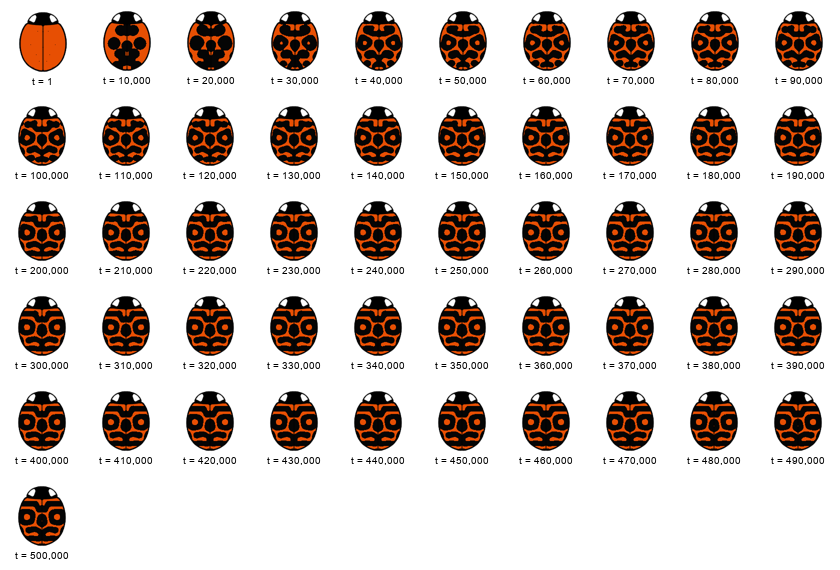

In [34]:
# Visualize the temporal evolution of ladybird by merging images.
img_ladybirds = merge_images(dpath_images,
                             n_cols=10,
                             infile_header="ladybird",
                             ratio_resize=0.5,
                             text_format="t = ",
                             font_size=10,
                             text_margin_ratio=.1)
img_ladybirds

In [42]:
img_ladybirds.save("output_ladybird.png")

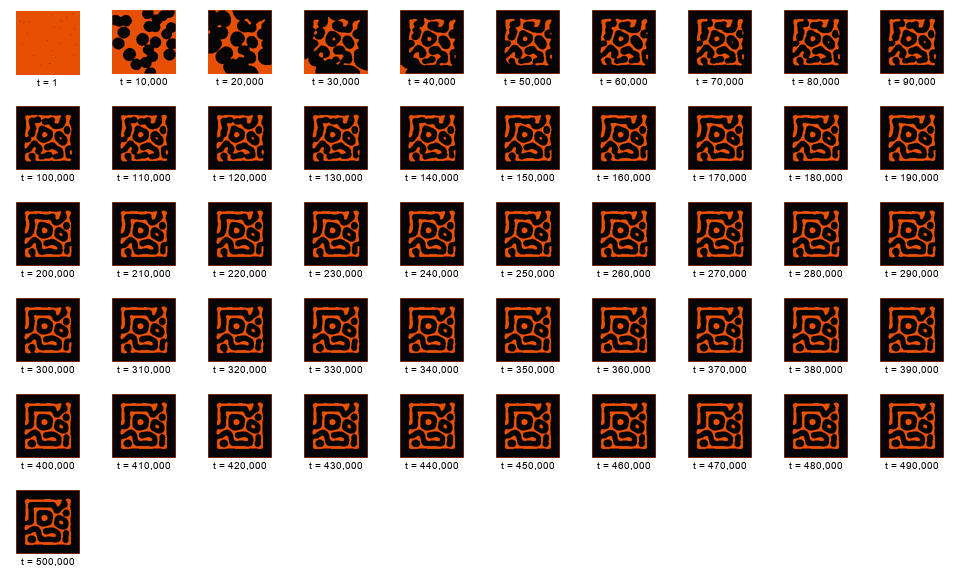

In [43]:
img_patterns = merge_images(dpath_images,
                            n_cols=10,
                            infile_header="pattern",
                            ratio_resize=0.5,
                            text_format="t = ",
                            font_size=10,
                            text_margin_ratio=.1)
img_patterns

In [45]:
img_patterns.save("output_pattern.png")